In [67]:
#importing the requests library
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import yfinance as yf #using the yahoo finance library 
import warnings
warnings.filterwarnings('ignore')

Getting stock data using the open source yahoo finance library. More information can be found [here](https://pypi.org/project/yfinance/)

In [19]:
#function to get stock data of a company

def stock_info(ticker):
    #define dates for 5 years
    start_date = '2017-01-01'
    end_date = '2022-12-31'
    df = yf.download(ticker,start=start_date,end=end_date)
    
    return df

In [20]:
def stock_return(ticker):
    df = stock_info(ticker) # run the function to get the stock data
    df_return = df[['Adj Close']]
    df_return['pct_change'] = df_return['Adj Close'].pct_change() # use pct change to calculate the diff 
    df_return.drop(df_return.index[0],inplace=True) # drop the Nan value from the first row
    
    #make a plot of the return
    fig,ax = plt.subplots(figsize=(15,8))
    ax.plot(df_return['pct_change']);
    ax.set_title('Stock Return Pct from 2017 to 2022:' +' ' + ticker);
    
    return fig,ax;
      

[*********************100%***********************]  1 of 1 completed


(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Stock Return Pct from 2017 to 2022: VOO'}>)

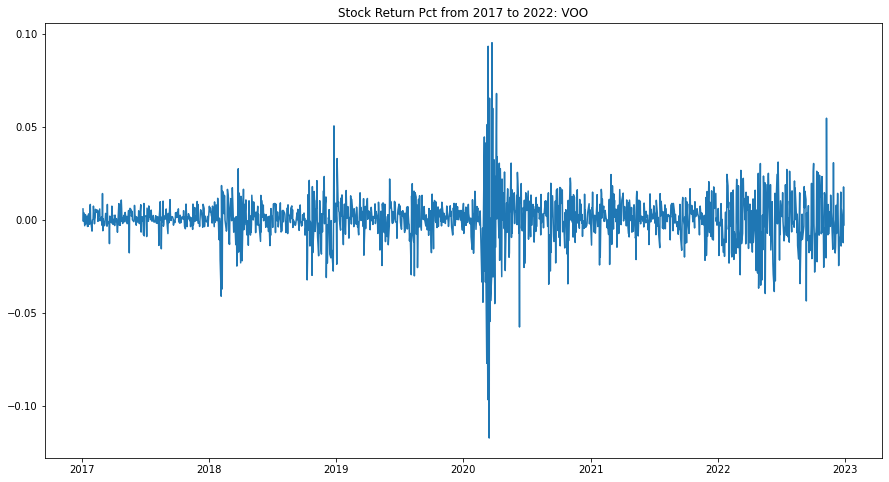

In [21]:
voo_return = stock_return('VOO')
voo_return

## stock evaluation

1. risk - need to calculate beta ratio
2. p/e ratio
3. p/b ratio
4. div yield

## calculate stock beta ratio

In [57]:
symbols = ['AXP', 'SPY']

In [58]:
data = yf.download(symbols, start = '2019-01-01',end = '2022-12-31')['Adj Close']
price_change = data.pct_change()
price_change

[*********************100%***********************]  2 of 2 completed


,AXP,SPY
Date,,
2019-01-02,NaN,NaN
2019-01-03,-0.019519,-0.023863
2019-01-04,0.045060,0.033496
2019-01-07,0.005428,0.007885
2019-01-08,0.004890,0.009395
...,...,...
2022-12-23,0.011768,0.005752
2022-12-27,-0.004285,-0.003944
2022-12-28,-0.016258,-0.012428


In [59]:
price_change.drop(price_change.index[0],inplace=True)

In [60]:
price_change

,AXP,SPY
Date,,
2019-01-03,-0.019519,-0.023863
2019-01-04,0.045060,0.033496
2019-01-07,0.005428,0.007885
2019-01-08,0.004890,0.009395
2019-01-09,0.001825,0.004673
...,...,...
2022-12-23,0.011768,0.005752
2022-12-27,-0.004285,-0.003944
2022-12-28,-0.016258,-0.012428


In [70]:
X = np.array(price_change['AXP']).reshape((-1,1))
y = np.array(price_change['SPY'])

In [73]:
X

array([[-0.01951933],
       [ 0.04506039],
       [ 0.00542794],
       ...,
       [-0.01625795],
       [ 0.02298453],
       [ 0.0029188 ]])

In [74]:
y

array([-0.02386276,  0.03349562,  0.0078848 , ..., -0.01242787,
        0.01800032, -0.00263408])

In [75]:
lr = LinearRegression()

In [79]:
model = lr.fit(X,y)

In [80]:
model.coef_

array([0.42172318])

<AxesSubplot:xlabel='SPY', ylabel='AXP'>

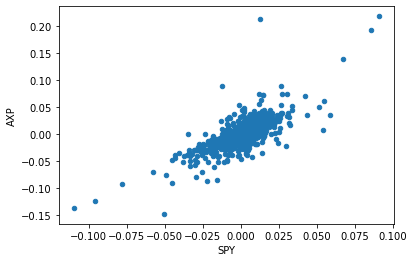

In [84]:
price_change.plot(y='AXP',x='SPY',kind='scatter')